<img src="https://www.sccpre.cat/mypng/full/403-4035365_tec-logo-png-logo-tec-de-monterrey.png"
        width="100"  style="float: left; margin-right: 10px;" /> 
       <div>
       <h1>Regresión Lineal Simple Caso Práctico</h1>
       <h4>Rezago Educativo y Pobreza<br>Armando Valdés López<br>Septiembre 2019</h4>
       </div>
     

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

## 01.-Entendimiento del Negocio

## 02.- Entendimiento de los Datos

In [2]:
Base_de_Datos= pd.read_excel('Pobreza_y_Rezago.xlsx')
Datos=pd.DataFrame(Base_de_Datos)
Datos.head(7)

,por_per_re_ed,por_per_po
0,12.691790,30.531104
1,22.348949,67.111172
2,28.544189,61.360527
3,18.775631,52.800458
4,17.741560,45.338512
5,16.534401,46.958330
6,17.799999,56.136204


In [3]:
print("Descripción de los Datos")
print("Observaciones y Variables",Datos.shape)
summary = Datos.describe()
print(" ")
print("Resumen de Datos Cuantitativos")
print(summary)

Descripción de los Datos
Observaciones y Variables (2456, 2)
 
Resumen de Datos Cuantitativos
       por_per_re_ed   por_per_po
count    2456.000000  2456.000000
mean       29.950428    67.421505
std        10.030251    18.516378
min         3.996080     8.745311
25%        23.035885    55.622230
50%        30.687310    69.862685
75%        37.046447    82.551284
max        63.178291    97.350405


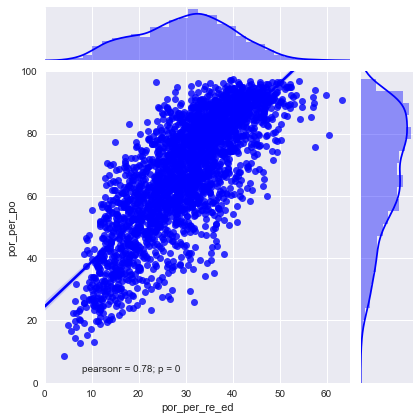

In [3]:
sns.set(style="darkgrid")
g = sns.jointplot("por_per_re_ed", "por_per_po", data=Datos,kind="reg",
                  xlim=(0,65) , ylim=(0, 100), color="b")

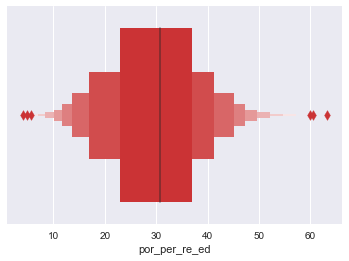

In [4]:
ax=sns.lvplot( x="por_per_re_ed",data=Datos, palette="Set1")
#ax =sns.stripplot(x="por_per_re_ed", data=Datos, size=4, jitter=True, color="gray")


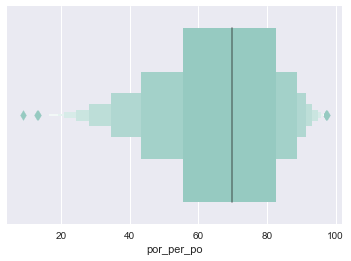

In [5]:
ax=sns.lvplot( x="por_per_po",data=Datos, palette="Set3")
#ax =sns.stripplot(x="por_per_po", data=Datos, size=4, jitter=True, color="gray")

## 03.-Preparación de los Datos

## 04.-Modelado

In [6]:
x=np.array(Datos.por_per_re_ed).reshape((-1,1))
y=np.array(Datos.por_per_po)

### a.- Modelo de Regresión Lineal

In [7]:
model1=LinearRegression()
model1.fit(x,y)
R_sq1=model1.score(x,y)
y_pred1=model1.predict(x)
ecm1=mean_squared_error(y,y_pred1)
rms1 = sqrt(mean_squared_error(y,y_pred1))

### b.- Modelo de RandomForest

In [22]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor()
model2.fit(x,y)
R_sq2=model2.score(x,y)
y_pred2=model2.predict(x)
ecm2=mean_squared_error(y,y_pred2)
rms2 = sqrt(mean_squared_error(y,y_pred2))

### c.- Modelo de Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
model3= Ridge()
model3.fit(x,y)
R_sq3=model3.score(x,y)
y_pred3=model3.predict(x)
ecm3=mean_squared_error(y,y_pred3)
rms3 = sqrt(mean_squared_error(y,y_pred3))

## 05.-Evaluación

### a'.- Evaluación Regresión Lineal

In [8]:
print("Intercepto a",model1.intercept_)
print("Pendiente b",model1.coef_)
print("Coeficiente de determinación",R_sq1)
print("Error cuadrático medio",ecm1)
print("Raiz del error cuadrático medio", rms1)
print("y = "+ str(model1.intercept_) + " + "+ str(model1.coef_) +"*"+"x" )

Intercepto a 24.5302868995
Pendiente b [ 1.43207364]
Coeficiente de determinación 0.601786245863
Error cuadrático medio 136.474482126
Raiz del error cuadrático medio 11.682229330298119
y = 24.5302868995 + [ 1.43207364]*x


### b'.- Evaluación RandomForest

In [29]:
#print("Intercepto a",model2.intercept_)
#print("Pendiente b",model2.coef_)
print("Coeficiente de determinación",R_sq2)
print("Error cuadrático medio",ecm2)
print("Raiz del error cuadrático medio", rms2)
#print("y = "+ str(model2.intercept_) + " + "+ str(model2.coef_) +"*"+"x" )

Coeficiente de determinación 0.910629015439
Error cuadrático medio 30.6289240599
Raiz del error cuadrático medio 5.534340435850639


### c'.- Evaluación Ridge Regression

In [35]:
print("Intercepto a",model3.intercept_)
print("Pendiente b",model3.coef_)
print("Coeficiente de determinación",R_sq3)
print("Error cuadrático medio",ecm3)
print("Raiz del error cuadrático medio", rms3)
print("y = "+ str(model3.intercept_) + " + "+ str(model3.coef_) +"*"+"x" )

Intercepto a 24.5304605561
Pendiente b [ 1.43206785]
Coeficiente de determinación 0.601786245853
Error cuadrático medio 136.474482129
Raiz del error cuadrático medio 11.68222933044282
y = 24.5304605561 + [ 1.43206785]*x


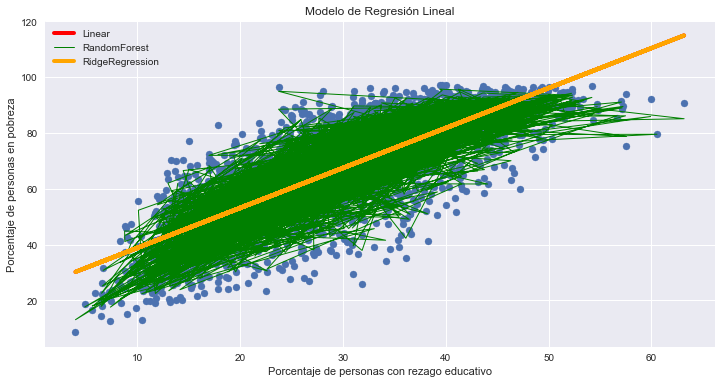

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Porcentaje de personas con rezago educativo")
plt.ylabel("Porcentaje de personas en pobreza")
plt.plot(x,y_pred1,color="red",linewidth=4)
plt.plot(x,y_pred2,color="green", linewidth=1)
plt.plot(x,y_pred3,color="orange",linewidth=4)
plt.legend(["Linear", "RandomForest", "RidgeRegression"], loc="upper left")

plt.show()

## 06.-Implementación